## Introduction
Sudoku is a popular game that involves logic, deduction and problem solving​​. If you are not familiar with the game, a detailed description can be found here: https://en.wikipedia.org/wiki/Sudoku

Use of arrays, sets and dictionaries and recursive backtracking, a very useful algorithm design technique.

The initial version of the program will be able to solve simple Sudoku problems, while the more advanced one, based on backtracking, should be able to solve all problems. 

In [3]:
from re import L
import matplotlib.pyplot as plt
import numpy as np


class Sudoku:

    def __init__(self, A):
        self.S = A
        self.find_neighbors()
        

    def print(self):
        print(self.S)


    def draw(self, title='', show_rc_nums=False, show_valid_vals=False):
        
        # Draw lines
        fig, self.ax = plt.subplots(figsize=(8,8))
        for i in range(0,10,3):
            self.ax.plot([i,i],[0,9],linewidth=2,color='k')
            self.ax.plot([0,9],[i,i],linewidth=2,color='k')
        for i in range(1,9):
            self.ax.plot([i,i],[0,9],linewidth=1,color='k')
            self.ax.plot([0,9],[i,i],linewidth=1,color='k')

        # Print row and column numbers if desired
        if show_rc_nums:
            for i in range(9):
                self.ax.text((-.5),(i+.5), str(i), size=12,color = 'r',
                    ha="center", va="center")
                self.ax.text((i+.5),(-.5), str(i), size=12,color = 'r',
                    ha="center", va="center")

        # Print known values
        for i in range(9):
            for j in range(9):
                if self.S[i][j] != 0:
                    self.ax.text((j+.5),(i+.5), str(self.S[i][j]), size=18,
                        ha="center", va="center")
                    
        # Print valid values using small green numbers, if desired 
        if show_valid_vals and hasattr(self,'V'):
            for i in range(9):
                for j in range(9):
                    if self.S[i][j] == 0:
                        for n in self.V[(i,j)]:
                            n1 = n-1
                            self.ax.text((j+.5+(n1%3-1)*.25),(i+.5+(n1//3-1)*.25), str(n), size=10,
                                         color = 'g', ha="center", va="center")

        self.ax.axis('off')
        self.ax.set_title(title, y=-.05,size = 18)
        self.ax.set_aspect(1.0)
        self.ax.invert_yaxis()
        plt.show()


    def find_neighbors(self):
      if type(self.S) is str:
        self.from_string()
      self.N = {}

      #adds cordinates and adds row neighbors
      for i, val in enumerate(self.S):
        for x in range(len(val)):
          self.N.update( {(i,x): [val] } )

      #adds column neighbors
      transNp = np.array(self.S)
      transNp = transNp.T
      for i in self.N:
        cord = i[1]
        tempThing = self.N[i]
        tempThing.append(list(transNp[cord]))

      #3x3 blocks
      threeNp = np.array(self.S)
      threeList= []
      r,c, rb, cb = 3, 3, 0, 0
      for i in range(0,9):
        if i != 0 and i%3 == 0:
          c,cb = 3, 0
          r += 3
          rb += 3
        tempNp = threeNp[rb:r, cb:c].reshape(1,9)
        for i in tempNp: 
          threeList.append(list(i))
        c+=3
        cb+=3
      
      #add 3x3 block to each value in self.N
      threeRow = 0
      for i in range(0,9,3):
        for j in range(0,9,3):
          for k in range(0,3):
            for l in range(0,3):
              tempThing = self.N[(i + k, j + l)]
              tempThing.append( threeList[threeRow] )
          threeRow += 1

    def init_valid(self):
        # Fill out dictionary V such that V[(r,c)], where (r,c) are the coordinates of a cell, contains the set of integers that can be 
        # written in cell (r,c) without breaking any of the rules
        # If a number has already been written in cell (r,c), then V[(r,c)] should contain the empty set
        self.V = {(i,j) : set(range(1,10)) for i in range(9) for j in range(9)}
        self.find_neighbors()
        for i, val in self.N.items():
          if self.S[i[0]][i[1]] == 0:
            for x in val:
              for k in x:
                if k in self.V[i]:
                  self.V[i].remove(k)
          else:
            self.V[i].clear()


    def solve(self):
        #fill known set  
        self.init_valid()
        known = set( (list(val)[0], i[0], i[1]) for i,val in self.V.items() if len(val) == 1 )
        
        #solves the puzzle
        while known:
          temp = known.pop()
          self.S[temp[1]] [temp[2]] = temp[0]
          self.V[ (temp[1], temp[2]) ].clear()
          self.init_valid()
          for i,val in self.V.items():
            if len(val) == 1:
              known.add( (list(val)[0] , i[0], i[1]) )
        
        #return values
        for i in self.V.values():
          if i:
            return 0
        for i in self.S:
          if not all(i):
            return -1
        return 1



      # If the puzzle has been solved (that is, all cells in S are filled), return 1
      # If there is a cell (r,c) that has not been filled but whose set of valid values is empty, return -1
      # Return 0 - the puzzle has not been solved, but it still may have a solution


    def from_string(self):
      if type(self.S) is str:
        temp = self.S.replace(".","0")
        tempNp = np.array(list(temp)).reshape(9,9)
        intlst = [ [int(x) for x in i] for i in tempNp ]
        self.S = intlst


    def to_string(self):
      if type(self.S) is not str:
        strSum = ""
        for i in self.S:
          for x in i:
            strSum += "." if x is 0 else str(x)
        return strSum
      



We will represent a Sudoku puzzle with a 2D array. If a given cell has already been filled, the corresponding array entry will contain the number in the cell; otherwise it will contain 0. 

Running the following cells shows an example of creating and displaying a  Sudoku object.


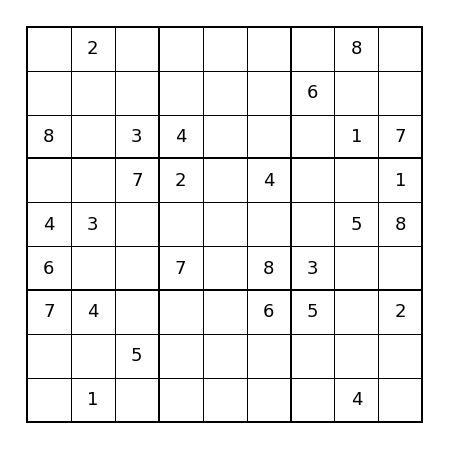

In [5]:
B = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(B)
S.draw()

We can also display the row and column numbers to make analysis easier.

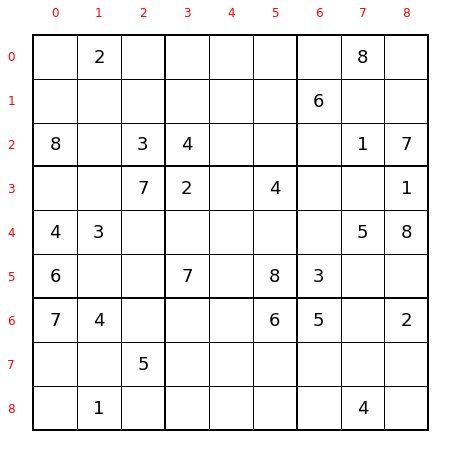

In [6]:
S.draw(show_rc_nums=True)

For this lab, initial puzzles will be encoded as strings with 81 characters. For example, the string 

```
s = '85...24..72......9..4.........1.7..23.5...9...4...........8..7..17..........36.4.'
```

encodes the puzzle shown below.



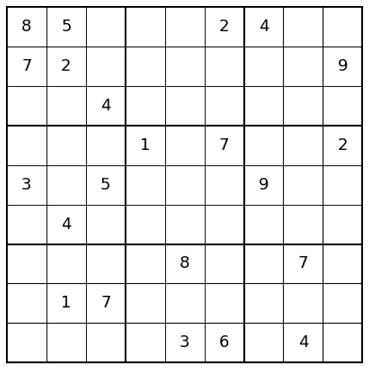

When solving a Sudoku by hand, we often write the numbers that can be placed in every empty cell, hoping to find a cell where only one number can be placed. 

For the puzzle above, we would obtain the following: 

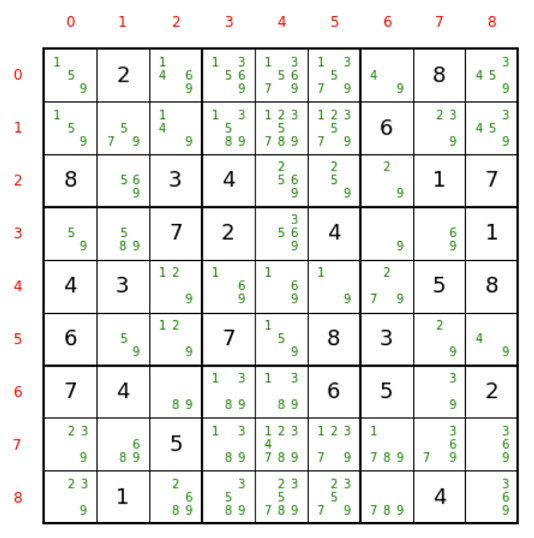

How was this obtained?

For every empty cell, we start with a set of all possible values. Then we remove the values that are present in the same row, column and region. The remaining values are the legal values.

For example, consider cell (4,5)

Initially S = {1,2,3,4,5,6,7,8,9}

We now remove from S the numbers that are in row 4, which are {4,3,5,8}

We are left with S = {1,2,6,7,9}

We now remove the elements of S that are in column 5 (which contains {4,8,6}]).

We are left with S = {1,2,7,9}

We now remove the elements of L that are in the same 3-by-3 region as cell (4,5) (which contains {2,4,7,8}).

We are left with S = {1,9}

Notice that S cannot be empty, unless the puzzle is unsolvable. 

What happens if S has a single number? Then we know that that number should be placed in that cell. 

For example, in the image above, we know that 9 should be placed in cell (3,6).

The code provided will draw the valid numbers in the corresponding cells, but the initial version of the valid numbers function just returns all integers from 1 to 9.

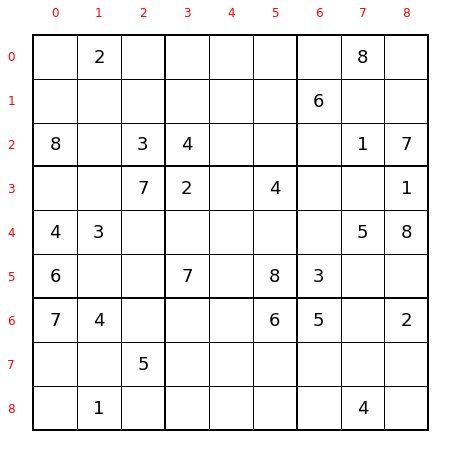

In [7]:
S.draw(show_rc_nums=True, show_valid_vals=True)

**1)** Extend the constructor to allow extracting a puzzle from a string, as described above. Implement also the to_string() function that converts the array representation S to a string. 


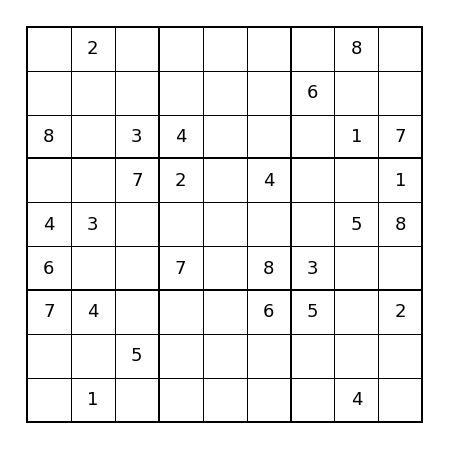

.2.....8.......6..8.34...17..72.4..143.....586..7.83..74...65.2..5.......1.....4.


In [8]:
s = '.2.....8.......6..8.34...17..72.4..143.....586..7.83..74...65.2..5.......1.....4.'
S = Sudoku(s)
S.from_string()
S.draw()
print(S.to_string())

**2)** Function *find_neighbors* that fills out a dictionary *N* where *N[(r,c)]* contains the set of cells that cannot hold the same value as cell *(r,c)*.

Notice that for all *(r,c)*, *N[(r,c)]* must contain exactly 20 elements. 

Why? For cell *(r,c)*, there are 8 cells in the same region as *(r,c)* (not counting *(r,c)*), there are also 6 cells in row *r* that are not in the same region as *(r,c)* and 6 cells in column *c* that are not in the same region as *(r,c)*. 



In [9]:
s = '.2.....8.......6..8.34...17..72.4..143.....586..7.83..74...65.2..5.......1.....4.'
S = Sudoku(s)
S.find_neighbors()
print(S.N.keys())
print(S.N[(0,5)])
print(len(S.N[(0,0)]))

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)])
[[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 4, 0, 8, 6, 0, 0], [0, 0, 0, 0, 0, 0, 4, 0, 0]]
3


**3)** Function *init_valid()* that fills out a dictionary *V* such that *V[(r,c)]* contains the set of numbers that can be written in cell *(r,c)* without breaking any of the rules.



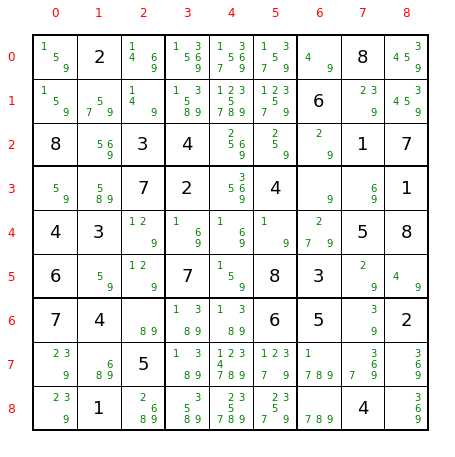

{1, 5, 9}
{9}


In [10]:
s = '.2.....8.......6..8.34...17..72.4..143.....586..7.83..74...65.2..5.......1.....4.'
S = Sudoku(s)
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)
print(S.V[(0,0)])
print(S.V[(3,6)])

How to find the valid values? 

For every cell *(r,c)* in the puzzle, initialize *V[(r,c)]* with all valid values *(V[(r,c)] = set(range(1,10)))*

For every filled cell in the original puzzle (such that *S.S[r][c] !=0*), remove *S.S[r][c]* from all neighbors of *(r,c)* (that is, all cells in *N[(r,c)]*).. 

For example, consider an initial puzzle with only one filled cell, as shown below.

All '2's are removed from the valid sets of the cells in the same row, column, and region as cell (0,1). 

s = .2...............................................................................
[[0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


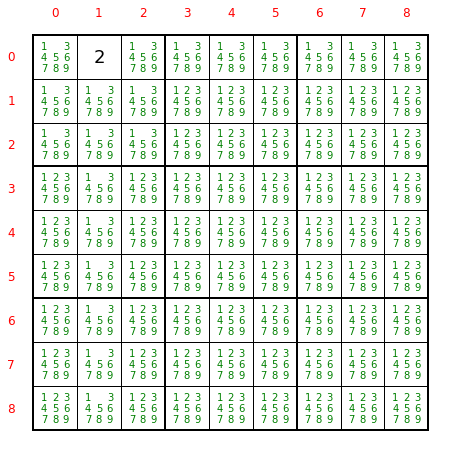

In [11]:
s = '.2'+''.join(['.']*79)
print('s =',s)
S = Sudoku(s)
S.print()
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)

#Testing of simple solver

Upload .txt file

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
f = open(".txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
for s in ss:
  print('Initial:\n',s)
  S = Sudoku(s)
  sol = S.solve()
  print('After executing solve():\n',S.to_string())
  print(sol)
  print()
  count[sol]+=1

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])

### Implementation of recursive backtracking.

In [15]:
def solve_backtrack(s):
  sudoku = Sudoku(s)
  sol = sudoku.solve()

  if sol == 1:
    return sudoku.to_string()
  if sol == -1:
    return None
  sudoku.init_valid()


  sodCord = []
  for i in sudoku.V:
    if len(sudoku.V[i]) >= 2:
      sodCord = i
      break

  for v in sudoku.V[sodCord]:
    cord = list(sodCord)
    sudoku.S[cord[0]][cord[1]] = v
    sol = solve_backtrack( sudoku.to_string() )
    if sol != None:
      return sol
  return None

In [ ]:
s = '8.........36......7..9.2...5...7.......457.....1...3...1....68..85....1..9....4..'
print(s)
sol = solve_backtrack(s)
print(sol)


In [ ]:
f = open(".txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
for s in ss:
  print('Initial:\n',s)
  sol = solve_backtrack(s)
  print('solve_backtrack(s) result:\n',sol)
  if sol!=None:
    count[1]+=1
  else:
    count[-1]+=1
  
print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])


Upload .txt file for backtracking solution

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import time
f = open(".txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
start = time.time()
for s in ss[:10]: # Only solves for 10 puzzles but can be done with all 1000 files in the hard1000.txt
  print('Initial:\n',s)
  sol = solve_backtrack(s)
  print('solve_backtrack(s) result:\n',sol)
  if sol!=None:
    count[1]+=1
  else:
    count[-1]+=1
elapsed_time2 = time.time() - start
print('elapsed time using set', elapsed_time2,'secs')

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])